# Logistic Regression

* labels: y
* inputs:  x

**model**

$$ w^T x = w_0 + w_1x_1 + w_2x_2 + w_3x_3 $$

$$ P(y|x) = σ(w^Tx) $$

## Given data:

D = ((x1, y1), ..., (xn, yn))
x ∈ R
y ∈ {0, 1}


## Pro's:

- interpretable
- small # params (d + 1)
- computationally efficient
- extensible to multi-class

## Cons

- performance as good as other models

## Maximum Likelihood Estimation MLE

likelihood 

$$l(w)= P(y_i | x_i, w) \cdot P(y_j | x_j, w) ... P(y_n | x_n,w)$$

in product notation

$$l(w) = \prod_{i=1}^{N}P(y_i |x_i, w) $$

So we need to find w that makes the function $ l(w) $ as large as possible. This is done with gradient ascent. (If we define a loss function, we use gradient descent)

![gradient_ascent](img/log_likelihood.png)

*$ll$ is the log likelihood, because this is a nice convex function*

$\triangledown f$ = vector of partial derivatives of f

$$ \triangledown ll(w) = 
\left(
\begin{array}{}
\frac{\partial ll}{\partial w_0} \\
\frac{\partial ll}{\partial w_1} \\
\vdots \\
\frac{\partial ll}{\partial w_n}
\end{array}
\right) $$

## Derivative of log likelihood

$$\frac{\partial ll(w)}{\partial w_j} = \sum_{i=1}^{N} h_i(x) (y_i - P(y_i|x_i, w)$$

or

$$\frac{\partial ll(w)}{\partial w_j} = \sum_{i=1}^{N} h(x) (y_i - \hat{y_i})$$

$h_j(x_i)$ is the individual input value taken from the $x$ vector (containing all input values)

## Deriving log-likelihood

log of the likelihood function

$$\ln l(w) = ln \prod_{i = 1}^{N} P(y_i|x_i, w)$$

By taking the log, the products becom the sum.

$$
\ln a \cdot b = \ln a + \ln b \\
\ln \frac{a}{b} = \ln a - \ln b
$$

The $\hat{w}$ that maximizes $l(w)$ is equal to the $\hat{w}$ that maximizes $\ln l(w)$.

In other words the peaks of the parabola are on the same places.

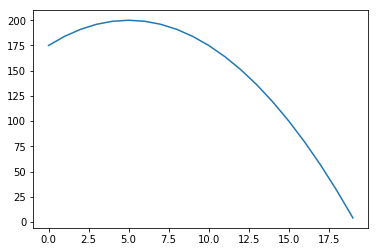

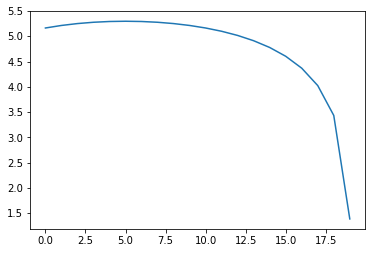

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# function
def fn(x):
    return -(x-5)**2 +200

x = np.arange(0, 20)
plt.plot(x, fn(x))
plt.show()

plt.plot(x, np.log(fn(x)))
plt.show()


$$\ln l(w) = ln \prod_{i = 1}^{N} P(y_i|x_i, w) = \sum_{i=1}^{N} \ln P(y_i|x_i, w) \tag{1}$$

We also add the label for simpler math:

$$\sum_{i=1}^{N} y_i \ln P(y_i|x_i, w) \tag{1}$$

$$P(y=0|x, w) = 1 - P(y= 1 | x, w) = 1 - \frac{1}{e^{-w^Th(x)}} \tag{2}$$

note:

$$1 - \frac{1}{x+1} = \frac{x+1}{x+1} - \frac{1}{x+1} = \frac{x}{x+1}$$

When applied to the formula (2):

$$P(y=0|x, w) = \frac{e^{-w^Th(x)}}{1 + e^{-w^Th(x)}} \tag{3}$$

Both probabilities are:

$$P(y=1|x, w) = \frac{1}{1 + e^{-w^Th(x)}} \tag{1.1}$$

$$P(y=0|x, w) = \frac{e^{-w^Th(x)}}{1 + e^{-w^Th(x)}} \tag{2.1}$$

Total formula:

$$ \ln l(w) = y_i  \ln \frac{1}{1 + e^{-w^Th(x)}} + y_i \ln \frac{e^{-w^Th(x)}}{1 + e^{-w^Th(x)}} \tag{4}$$

Simplifying:

$$ \ln \frac{1}{1 + e^{-w^Th(x)}} = -\ln (1 + e^{-w^Th(x)}) \tag{1.2}$$

$$ \ln \frac{e^{-w^Th(x)}}{1 + e^{-w^Th(x)}} = \ln (e^{-w^Th(x)}) -\ln(1 + e^{-w^Th(x)}) \tag{2.2}$$

Further simplifying:

$$ \ln e^a = a$$

$$ -w^Th(x) -\ln(1 + e^{-w^Th(x)}) \tag{2.3}$$


After all simplifications the log likelihood function becomes (Cannot replicate it) :(: 

$$ \ln l = \sum_{i=1}^{N}y_i w^T x_i - \ln(1+ e^{w^T x_i})$$

$$\triangledown \ln l= \sum_{i=1}^{N} h(x) (y_i - \hat{y_i})$$


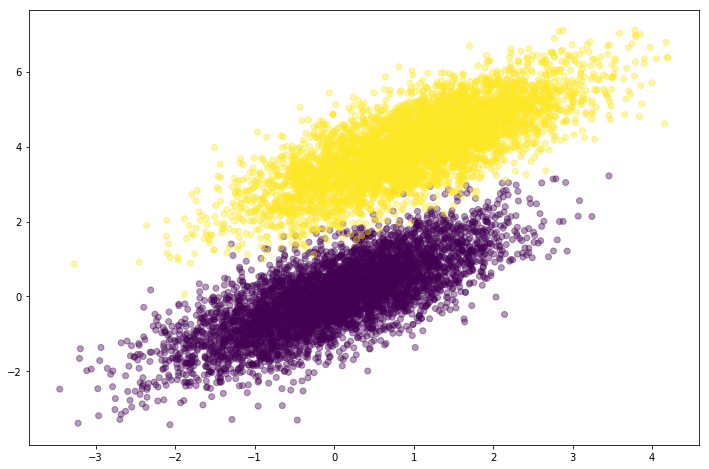

In [143]:
np.random.seed(0)
num_observations = 5000

x1 = np.random.multivariate_normal([0, 0], [[1, .75], [.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75], [.75, 1]], num_observations)

features = np.vstack((x1, x2))
labels = np.hstack((np.zeros(num_observations), np.ones(num_observations)))
plt.figure(figsize=(12, 8))
plt.scatter(features[:,0], features[:,1], alpha=.4, c=labels)
plt.show()


In [158]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def log_likelihood(z, y):
    return np.sum(y * z - np.log(1 + np.exp(z)))

def gradient(x, y, a):
    return np.dot(x.T, (y - a))

def log_regr(x, y, n, eta):
    intercept = np.ones((x.shape[0], 1))  # bias as 1 * wbias = wbias
    x = np.hstack((intercept, x)) # add to the inputs    
    w = np.random.standard_normal(x.shape[1])

    for i in range(n):
        z = np.dot(x, w)
        
        ll = log_likelihood(z, y)
        prediction = sigmoid(z)

        dw = gradient(x, y, prediction)
    
        w += eta * dw
        
        if i % 100 == 0:
            print(f"Score: {ll}") # , w: {w}, dw, {dw}")
            
    return w
            
w = log_regr(features, labels, 5000, 1e-4)

Score: -5954.892449294746
Score: -498.20255757965316
Score: -350.5808749406438
Score: -292.93254194794474
Score: -261.1174211867518
Score: -240.59940601572433
Score: -226.12429319454873
Score: -215.29620999117014
Score: -206.8547580368404
Score: -200.068756580291
Score: -194.48262542221624
Score: -189.79657736766856
Score: -185.80464746775425
Score: -182.36029469165794
Score: -179.35619655046423
Score: -176.71181606704357
Score: -174.36544807294422
Score: -172.26896020650537
Score: -170.3842154300599
Score: -168.680577514434
Score: -167.1331334953521
Score: -165.72140245990641
Score: -164.4283813996932
Score: -163.23982921970457
Score: -162.14372195511714
Score: -161.12983300913268
Score: -160.18940599227997
Score: -159.3148970463256
Score: -158.49976993054196
Score: -157.7383316131317
Score: -157.02559927358772
Score: -156.3571918923439
Score: -155.72924125417734
Score: -155.13831840477053
Score: -154.58137250094836
Score: -154.05567967120572
Score: -153.5588000151348
Score: -153.0885

In [173]:
from sklearn.linear_model import LogisticRegression

lrc = LogisticRegression(fit_intercept=True)
lrc.fit(features, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [174]:
lrc.score(features, labels)

0.995